In [1]:
import requests
from datetime import datetime
import pandas as pd



def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)

    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data


def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df

from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)

current_datetime = datetime.now().date().isoformat()
df.index = df['datetime']

Filtering 0 empty datapoints


<ipython-input-1-aa143af81868>:26: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(data, ['Data'])


In [2]:
df.head()

,datetime,low,high,open,close,volumefrom,volumeto
datetime,,,,,,,
2015-10-28,2015-10-28,294.40,308.48,295.59,304.05,30679.48,9258154.13
2015-10-29,2015-10-29,301.70,319.60,304.77,313.73,31657.38,9831879.91
2015-10-30,2015-10-30,313.50,334.05,314.95,328.78,38136.60,12367475.77
2015-10-31,2015-10-31,302.99,334.67,328.15,310.06,28649.04,9115142.28
2015-11-01,2015-11-01,303.01,329.85,309.30,328.98,14020.62,4435611.06


In [3]:
# import pandas as pd
# df = pd.read_csv("BTC-USD.csv", index_col='Date')
# df

<AxesSubplot:ylabel='datetime'>

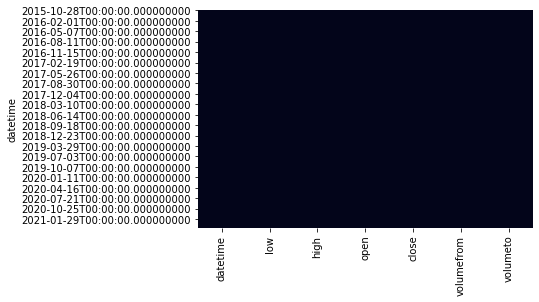

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df['close'][df['close'].isna()]

Series([], Name: close, dtype: float64)

<AxesSubplot:ylabel='datetime'>

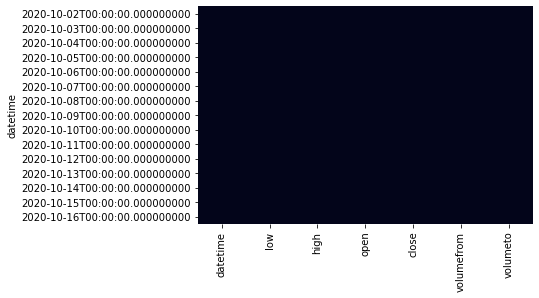

In [6]:
sns.heatmap(df.loc["2020-10-02":"2020-10-16"].isnull(), cbar=False)

In [7]:
df = df.dropna(axis=0, how="any")

<AxesSubplot:ylabel='datetime'>

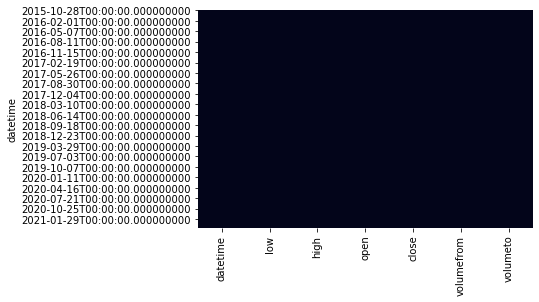

In [8]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:xlabel='datetime'>

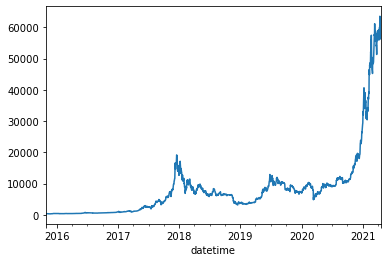

In [9]:
df['close'].plot()

<AxesSubplot:xlabel='datetime'>

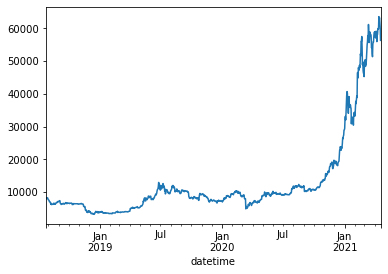

In [10]:
df['close'][-1000:].plot()

<AxesSubplot:xlabel='datetime'>

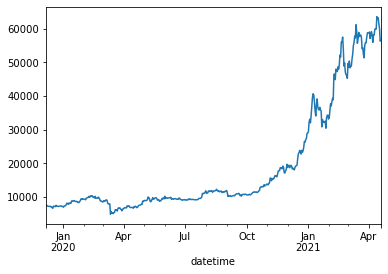

In [11]:
df['close'][-500:].plot()

<AxesSubplot:xlabel='datetime'>

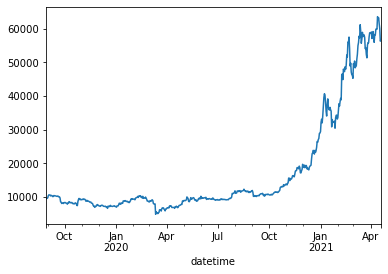

In [12]:
df['close'][-600:].plot()

In [74]:
rahul = 600

In [75]:
df_d = df[-rahul:].copy()
# df_d = df.copy()
df_d.head()

,datetime,low,high,open,close,volumefrom,volumeto
datetime,,,,,,,
2019-08-29,2019-08-29,9320.00,9720.20,9711.78,9490.00,7717.11,73190665.17
2019-08-30,2019-08-30,9350.10,9700.00,9490.00,9579.75,5317.31,50745922.28
2019-08-31,2019-08-31,9443.19,9682.73,9579.75,9594.15,1572.16,15068565.55
2019-09-01,2019-09-01,9538.75,9832.00,9594.15,9767.53,1799.37,17385154.88
2019-09-02,2019-09-02,9753.24,10471.00,9767.53,10384.48,6144.80,62231973.86


In [76]:
df_d.tail()

,datetime,low,high,open,close,volumefrom,volumeto
datetime,,,,,,,
2021-04-15,2021-04-15,61998.90,63855.37,62986.09,63239.19,3433.45,2.161317e+08
2021-04-16,2021-04-16,60042.04,63580.40,63239.19,61436.24,5778.82,3.552687e+08
2021-04-17,2021-04-17,59676.67,62596.48,61436.24,60032.29,3091.48,1.889280e+08
2021-04-18,2021-04-18,51541.16,60433.81,60032.29,56280.60,12869.86,7.152348e+08
2021-04-19,2021-04-19,55826.85,57633.00,56280.60,56581.90,2491.76,1.419457e+08


In [77]:
len(df_d)

600

In [78]:
# df_d2 = pd.DataFrame(data=df_d['Close'], index=df_d.index)
# for i in range(len(df['Close'])):
#     df_d2['Close'][i] = df_d['Close'][i]
# df_d2
df_d = pd.DataFrame(df_d['close'])

In [79]:
df_d.head()

,close
datetime,
2019-08-29,9490.00
2019-08-30,9579.75
2019-08-31,9594.15
2019-09-01,9767.53
2019-09-02,10384.48


[]

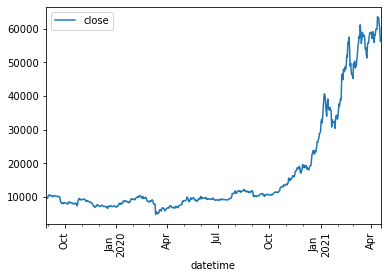

In [80]:
import matplotlib.pyplot as plt
df_d.plot()
plt.xticks(rotation=90)
plt.plot()

[]

<Figure size 1152x576 with 0 Axes>

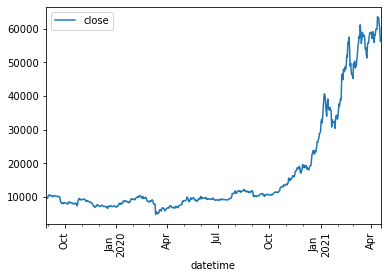

In [81]:

plt.figure(figsize=(16,8))
df_d = df_d.sort_index(axis=0)
df_d.plot()
plt.xticks(rotation=90)
plt.plot()

In [82]:
import matplotlib.pyplot as plt

[]

<Figure size 1152x576 with 0 Axes>

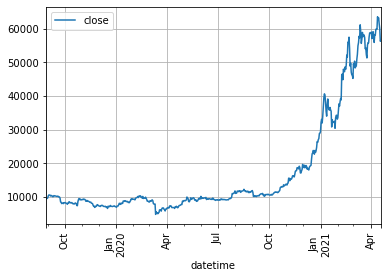

In [83]:
plt.figure(figsize=(16,8))
df_d = df_d.sort_index(axis=0)
df_d.plot()
# plt.xticks([x for x in range(220,270,5)])
plt.xticks(rotation=90)
plt.grid()
plt.plot()

In [84]:
# df1=df.reset_index()['close']

In [85]:
# df1

In [86]:
# import matplotlib.pyplot as plt
# plt.plot(df_d)

In [87]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [88]:
import numpy as np

In [89]:
df_d.shape

(600, 1)

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_d=scaler.fit_transform(np.array(df_d).reshape(-1,1))
df_d.shape

(600, 1)

In [91]:
print(df_d)

[[0.07915715]
 [0.08068551]
 [0.08093073]
 [0.08388325]
 [0.09438939]
 [0.09835939]
 [0.09782553]
 [0.09761096]
 [0.09313962]
 [0.09609077]
 [0.09465674]
 [0.09307763]
 [0.08947681]
 [0.09047234]
 [0.09500005]
 [0.09411981]
 [0.09389367]
 [0.09304851]
 [0.09243955]
 [0.09117513]
 [0.09043198]
 [0.09246594]
 [0.09072028]
 [0.08759135]
 [0.08819248]
 [0.08242998]
 [0.06292529]
 [0.06114302]
 [0.05472081]
 [0.05698041]
 [0.05749725]
 [0.05459429]
 [0.05886605]
 [0.05921617]
 [0.06014273]
 [0.05786934]
 [0.05637332]
 [0.05625582]
 [0.05129949]
 [0.0572837 ]
 [0.05682409]
 [0.06376858]
 [0.06369654]
 [0.05830579]
 [0.05895086]
 [0.05860227]
 [0.05996511]
 [0.05642543]
 [0.05371371]
 [0.05503228]
 [0.05301875]
 [0.05311088]
 [0.05779815]
 [0.05742198]
 [0.05422476]
 [0.04477136]
 [0.04416223]
 [0.06506824]
 [0.07511698]
 [0.08029946]
 [0.07449865]
 [0.07808329]
 [0.0735365 ]
 [0.07336842]
 [0.07507781]
 [0.07600249]
 [0.07433789]
 [0.07780775]
 [0.07626457]
 [0.07668417]
 [0.07420779]
 [0.06

In [195]:
##splitting dataset into train and test split
training_size=int(len(df_d)*0.90)
test_size=len(df_d)-training_size
train_data,test_data=df_d[0:training_size,:],df_d[training_size:len(df_d),:1]

In [196]:
len(train_data), len(test_data)

(540, 60)

In [197]:
training_size,test_size

(540, 60)

In [198]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [199]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [200]:
len(y_test)

54

In [201]:
len(X_test), len(y_test)

(54, 54)

In [202]:
print(X_train.shape), print(y_train.shape)

(534, 5)
(534,)


(None, None)

In [203]:
print(X_test.shape), print(y_test.shape)

(54, 5)
(54,)


(None, None)

In [204]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [205]:
X_train.shape, X_test.shape

((534, 5, 1), (54, 5, 1))

In [206]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [207]:
X_test.shape[1]

5

In [208]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_test.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [209]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 50)             10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 5, 50)             20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [210]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
9/9 [==============================] - 13s 305ms/step - loss: 0.0408 - val_loss: 0.4233
Epoch 2/20
9/9 [==============================] - 0s 30ms/step - loss: 0.0169 - val_loss: 0.2062
Epoch 3/20
9/9 [==============================] - 0s 25ms/step - loss: 0.0109 - val_loss: 0.0483
Epoch 4/20
9/9 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.1017
Epoch 5/20
9/9 [==============================] - 0s 25ms/step - loss: 0.0015 - val_loss: 0.0146
Epoch 6/20
9/9 [==============================] - 0s 25ms/step - loss: 6.7722e-04 - val_loss: 0.0040
Epoch 7/20
9/9 [==============================] - 0s 25ms/step - loss: 6.0944e-04 - val_loss: 0.0202
Epoch 8/20
9/9 [==============================] - 0s 25ms/step - loss: 4.6915e-04 - val_loss: 0.0136
Epoch 9/20
9/9 [==============================] - 0s 25ms/step - loss: 3.8581e-04 - val_loss: 0.0082
Epoch 10/20
9/9 [==============================] - 0s 25ms/step - loss: 4.4304e-04 - val_loss: 0.0095
Epoch 1

In [211]:
import tensorflow as tf

In [212]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [213]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [214]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14842.403057467114

In [215]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

56402.22943812085

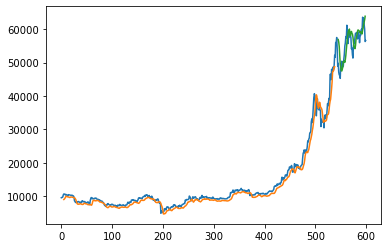

In [216]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df_d)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_d)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_d)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_d))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [217]:
len(test_data)

60

In [218]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape

(1, 5)

In [219]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [220]:
temp_input

[0.994460585247879,
 0.9637578651294105,
 0.939849778987075,
 0.8759616578293852,
 0.8810925430850465]

In [221]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<10):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97497076]
6
1 day input [0.96375787 0.93984978 0.87596166 0.88109254 0.97497076]
1 day output [[0.949504]]
2 day input [0.93984978 0.87596166 0.88109254 0.97497076 0.94950402]
2 day output [[0.9324406]]
3 day input [0.87596166 0.88109254 0.97497076 0.94950402 0.93244058]
3 day output [[0.9240094]]
4 day input [0.88109254 0.97497076 0.94950402 0.93244058 0.92400938]
4 day output [[0.9451706]]
5 day input [0.97497076 0.94950402 0.93244058 0.92400938 0.94517058]
5 day output [[0.9698326]]
6 day input [0.94950402 0.93244058 0.92400938 0.94517058 0.9698326 ]
6 day output [[0.95727533]]
7 day input [0.93244058 0.92400938 0.94517058 0.9698326  0.95727533]
7 day output [[0.9544994]]
8 day input [0.92400938 0.94517058 0.9698326  0.95727533 0.95449942]
8 day output [[0.96030414]]
9 day input [0.94517058 0.9698326  0.95727533 0.95449942 0.96030414]
9 day output [[0.9725354]]
[[0.9749707579612732], [0.949504017829895], [0.9324405789375305], [0.924009382724762], [0.9451705813407898], [0.96983259

In [222]:
lst_output

[[0.9749707579612732],
 [0.949504017829895],
 [0.9324405789375305],
 [0.924009382724762],
 [0.9451705813407898],
 [0.9698325991630554],
 [0.9572753310203552],
 [0.9544994235038757],
 [0.9603041410446167],
 [0.9725353717803955]]

In [223]:
scaler.inverse_transform(lst_output)

array([[62094.69257532],
       [60599.21403326],
       [59597.20095324],
       [59102.09741996],
       [60344.74246566],
       [61792.96545246],
       [61055.5673812 ],
       [60892.55829153],
       [61233.42761678],
       [61951.67985534]])

In [179]:
day_new=np.arange(1,6)
day_pred=np.arange(101,107)

In [61]:
day_new, day_pred

(array([1, 2, 3, 4, 5]), array([101, 102, 103, 104, 105, 106]))

In [62]:
model.save("BTC_Model.h5")

In [63]:
from keras.models import load_model

In [64]:
modll = load_model("BTC_Model.h5")

In [65]:
abc = np.array([1.  ,       0.99327279, 0.99676343, 0.96653985, 0.99152529])
abc

array([1.        , 0.99327279, 0.99676343, 0.96653985, 0.99152529])

In [66]:
abc.shape

(5,)

In [67]:
abc = abc[:,np.newaxis]

In [68]:
abc.shape

(5, 1)

In [69]:
abc.ndim

2

In [70]:
abc = abc.reshape(1,5,1)

In [71]:
abc.shape

(1, 5, 1)

In [72]:
abc

array([[[1.        ],
        [0.99327279],
        [0.99676343],
        [0.96653985],
        [0.99152529]]])

In [73]:
scaler.inverse_transform(modll.predict(abc))

array([[51189.453]], dtype=float32)